In [ ]:
from scipy.io.wavfile import write
import numpy as np
import librosa.display



def shift_right_channel(input_array, time_ms, period):
    num_zeros = int(np.round(time_ms / (period * 1000)))
    shifted_left = np.append(input_array, np.zeros(num_zeros))
    shifted_right = np.insert(input_array, 0, np.zeros(num_zeros))
    shifted_array = np.column_stack((shifted_left, shifted_right))

    # Normalize the shifted array
    normalized_shifted = shifted_array / np.max(np.abs(shifted_array))

    # Scale to 16-bit PCM format
    pcm = np.int16(normalized_shifted * 32767)

    return pcm

def attenuate_right_channel(input, db):
    factor_map = {'-3': 0.5, '-6': 0.25, '-1.5': 0.75}
    factors = factor_map.get(db, None)

    attenuated = input * 10 ** (float(db) / 20)  # Scaling based on dB
    factor_array = attenuated * factors
    return np.column_stack((input, factor_array))

def save_wav(filename, sr, data):
    write(filename, sr, data)

if __name__ == "__main__":
    y, sr = librosa.load("CrazyFredrick.wav", sr=44100)

    period = 1 / sr
    stereo =  np.column_stack((y, y))

    shifts = [0.44, 1, 10, 100]
    attenuations = ['-1.5', '-3', '-6']

    for ms in shifts:
        shifted_data = shift_right_channel(y, ms, period)
        save_wav(f"team-stereosoundfile-{ms}ms.wav", sr, shifted_data)

    for db in attenuations:
        attenuated_data = attenuate_right_channel(y, db)
        save_wav(f"team-stereosoundfile-{db.replace('.', '_')}db.wav", sr, attenuated_data)

    save_wav(f"team-stereosoundfile.wav", sr, stereo)



In [ ]:

from scipy.io.wavfile import write
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np

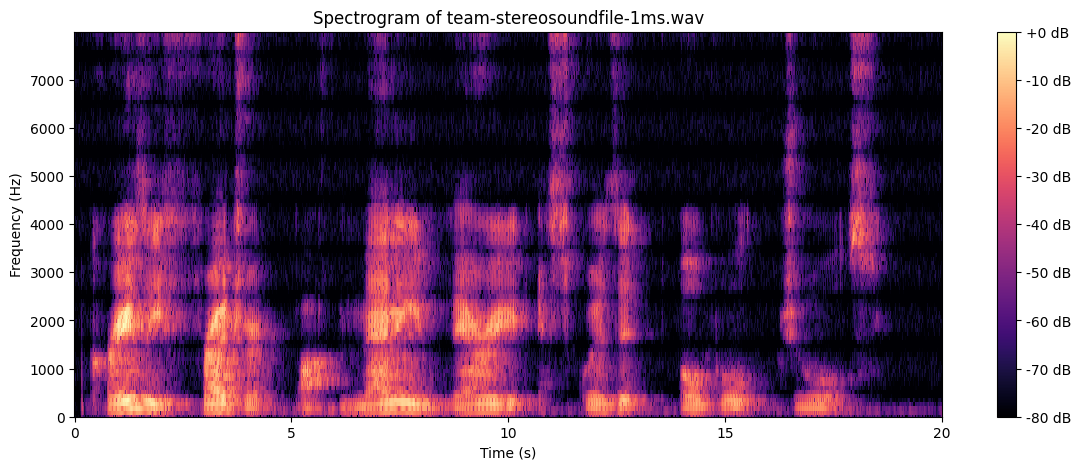

In [ ]:
def generate_spectrogram(filename):
    # Load the audio file
    y, sr = librosa.load(filename, sr=44100)

    # Generate the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=512)), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')

    # Set Y-axis limits and ticks
    ax = plt.gca()
    ax.set_ylim([0, 8000])
    start, end = ax.get_ylim()
    ax.set_yticks(np.arange(start, end, 1000))

    # Add colorbar and labels
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram of ' + filename)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    # Save the spectrogram as an image
    output_filename = filename.replace(".wav", "_spectrogram.png")
    plt.savefig(output_filename)

    # Show the spectrogram
    plt.show()

if __name__ == "__main__":


    # Generate and display the spectrogram
    generate_spectrogram("team-stereosoundfile-1ms.wav")
